# Project 1

### Import toolboxes and define constants:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as la

In [2]:
w=np.array([0.5, 0.3, 0.2]) #cm
k=np.array([0.05, 0.15, 0.03])#watt/cm/C
h_in=1 #watt/cm2/C
h_out=0.8 #watt/cm2/C
T_in=200 #C
T_out=20 #C

### Solve the system of equations for any given variables:

In [3]:
def Tvals(w,k,h_in,h_out,T_in,T_out): #w and k are vectors containing 3 values for the respective constants
    x=[[h_in*T_in],[0],[0],[h_out*T_out]]
    A=np.array([[((k[0]/w[0])+h_in),-(k[0]/w[0]),0,0],[k[0]/w[0],-((k[0]/w[0])+(k[1]/w[1])),-(k[1]/w[1]),0],[0,k[1]/w[1],-((k[1]/w[1])+(k[2]/w[2])),-(k[2]/w[2])],[0,0,k[2]/w[2],-((k[0]/w[0])+h_in)]],dtype=float)
    b=np.array(x,dtype=float)

    T=la.solve(A,b)
    return T

### Plot the data points and the polynomial fit line:

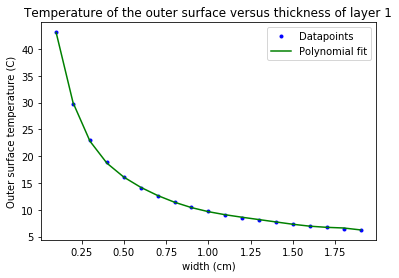

The coefficient of determination is: -18.998173590569387


In [4]:
T3 = []
for i in np.arange(0.1,2,0.1): #i is w1 in mm
    w1=np.array([i, 0.3, 0.2])
    Tvar=Tvals(w1,k,h_in,h_out,T_in,T_out)
    T3.append(Tvar[2])

    
x= np.arange(0.1,2,0.1)   

fit_quadratic=np.polyfit(x,T3,7)
y2 = np.polyval(fit_quadratic,x)
plt.plot(x,T3,'b.',label="Datapoints")
plt.plot(x,y2,'g-',label="Polynomial fit") 
plt.xlabel('width (cm)')
plt.ylabel('Outer surface temperature (C)')
plt.title('Temperature of the outer surface versus thickness of layer 1')
plt.legend(loc='upper right')

plt.show()
    
ymean=np.mean(T3)
sstot=sum((T3-ymean)**2)
ssres=sum((T3-y2)**2)
rs=1-ssres/sstot
print('The coefficient of determination is:',sum(rs))

### Determin the allowable thickness range of layer 1 to ensure the temperature of the outer surface stays between 34.5 and 35.5 derees celcius:

In [178]:
xx=np.linspace(0.13,0.17,500)
n=len(x)
yy=np.zeros(xx.shape)

for i in range(n):
    product=y2[i]
    for j in range(n):
        if j!=i:
            product*=(xx-x[j])/(x[i]-x[j])
    yy+=product
        
# convert to dataframe
T_vals=pd.DataFrame(yy,xx) 
my_max=T_vals[T_vals[0]<=35.5]
my_min=T_vals[T_vals[0]>=34.5]

print('The maximum thickness of layer 1 is:', my_max[0])
print('The minimum thickness of layer 1 is:', my_min[0])

The minimum thickness of layer 1 is: 0.150200    35.496316
0.150281    35.485996
0.150361    35.475682
0.150441    35.465372
0.150521    35.455068
              ...    
0.169679    33.130347
0.169760    33.121176
0.169840    33.112010
0.169920    33.102848
0.170000    33.093690
Name: 0, Length: 248, dtype: float64
